<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [41]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf
# added import
from sklearn.model_selection import train_test_split

# Define start day to fetch the dataset from the yahoo finance library

---



In [42]:
START = "2024-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [43]:
data = load_data('QUBT')
df=data
df.head()

/tmp/ipykernel_2212/2246684337.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,QUBT,QUBT,QUBT,QUBT,QUBT
0,2024-01-02,0.895,0.960,0.886,0.929,553200
1,2024-01-03,0.864,0.915,0.850,0.880,521800
2,2024-01-04,0.848,0.882,0.821,0.865,572400
3,2024-01-05,0.818,0.870,0.818,0.865,401300
4,2024-01-08,0.880,0.880,0.831,0.854,651300


In [44]:
df = df.drop(['Date'], axis = 1)
df.head()

/tmp/ipykernel_2212/3502562368.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,QUBT,QUBT,QUBT,QUBT,QUBT
0,0.895,0.960,0.886,0.929,553200
1,0.864,0.915,0.850,0.880,521800
2,0.848,0.882,0.821,0.865,572400
3,0.818,0.870,0.818,0.865,401300
4,0.880,0.880,0.831,0.854,651300


In [67]:
# explore the data
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,QUBT,QUBT,QUBT,QUBT,QUBT
count,441.000000,441.000000,441.000000,441.000000,4.410000e+02
mean,6.501438,6.879946,6.101737,6.459601,1.670177e+07
std,6.794999,7.176931,6.367208,6.738371,2.917515e+07
min,0.421000,0.468000,0.355000,0.416000,1.611000e+05
25%,0.752000,0.770000,0.720000,0.750000,8.007000e+05
50%,2.540000,3.000000,2.220000,2.520000,5.861800e+06
75%,11.490000,12.420000,10.550000,11.330000,1.961770e+07
max,25.680000,27.150000,20.910000,22.000000,2.326194e+08


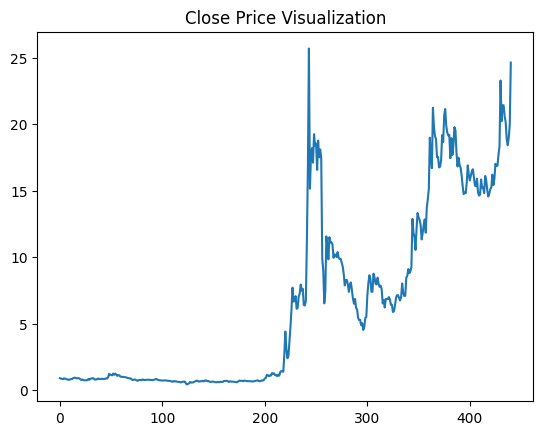

In [45]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [46]:
df

Price,Close,High,Low,Open,Volume
Ticker,QUBT,QUBT,QUBT,QUBT,QUBT
0,0.895000,0.960000,0.886000,0.929000,553200
1,0.864000,0.915000,0.850000,0.880000,521800
2,0.848000,0.882000,0.821000,0.865000,572400
3,0.818000,0.870000,0.818000,0.865000,401300
4,0.880000,0.880000,0.831000,0.854000,651300
...,...,...,...,...,...
436,18.850000,21.299999,18.674999,20.700001,32791800
437,18.410000,19.290001,18.209999,18.850000,20906600
438,18.969999,19.680000,18.000000,18.340000,20377000


# Plotting moving averages of 100 day

---



In [47]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,QUBT
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
436,15.90595
437,16.01925
438,16.12455
439,16.23845


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

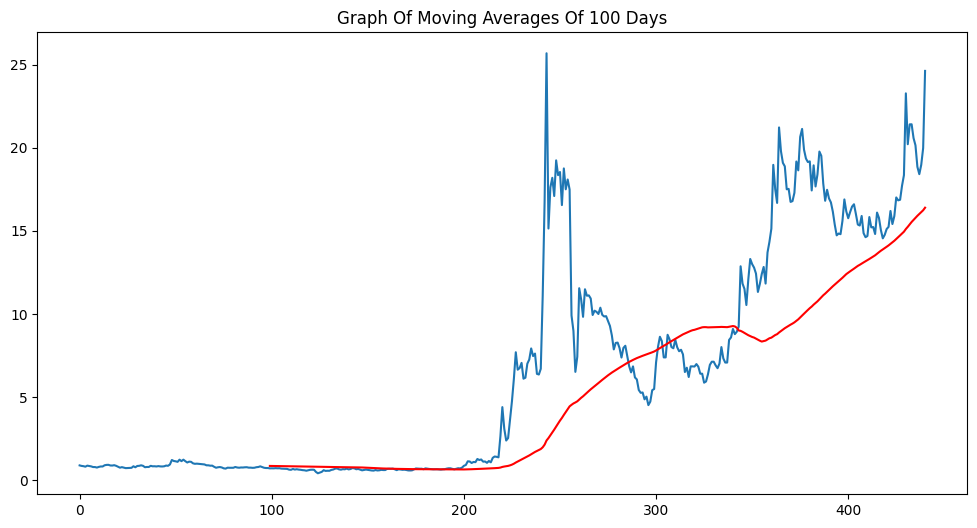

In [48]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [49]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,QUBT
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
436,12.560050
437,12.614000
438,12.676850
439,12.744950


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

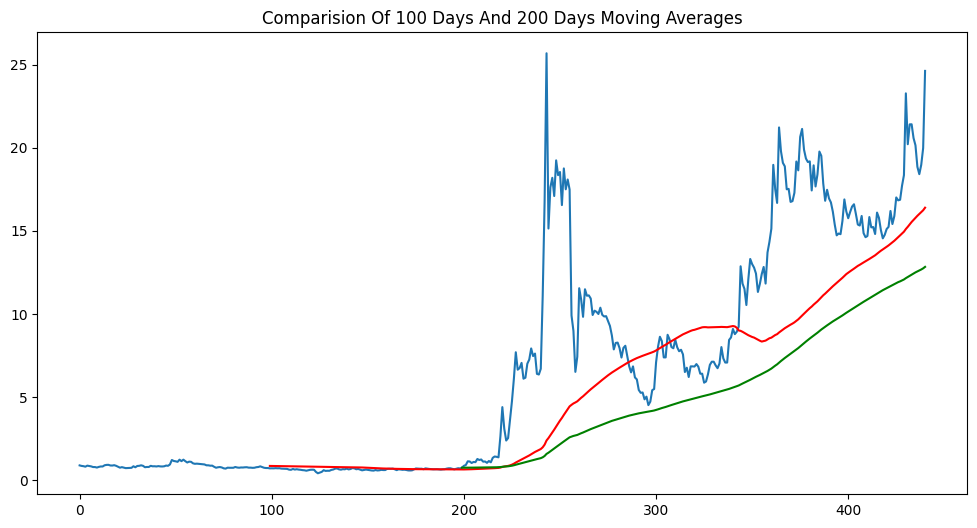

In [50]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [51]:
df.shape

(441, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [52]:
# Splitting data into training and testing
# take the first 70% of the data as training data and the rest 30% as testing data
train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))]) # take the rest 30% as testing data

print("Train shape: ", train.shape)
print("Test shape: ", test.shape)


Train shape:  (308, 6)
Test shape:  (133, 6)


In [53]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,QUBT,QUBT,QUBT,QUBT,QUBT
0,2024-01-02,0.895,0.960,0.886,0.929,553200
1,2024-01-03,0.864,0.915,0.850,0.880,521800
2,2024-01-04,0.848,0.882,0.821,0.865,572400
3,2024-01-05,0.818,0.870,0.818,0.865,401300
4,2024-01-08,0.880,0.880,0.831,0.854,651300


In [54]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,QUBT,QUBT,QUBT,QUBT,QUBT
308,2025-03-26,8.01,8.880,7.800,8.560,15657200
309,2025-03-27,7.94,7.998,7.580,7.870,10672400
310,2025-03-28,8.45,8.540,7.305,7.725,19074500
311,2025-03-31,8.00,8.970,7.650,8.020,24269500
312,2025-04-01,7.76,8.400,7.350,8.200,18944700


# Using MinMax scaler for normalization of the dataset

---



In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [56]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values
train_close[0]


array([0.92900002])

In [57]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.02376761],
       [0.0214974 ],
       [0.02080245],
       [0.02080245],
       [0.02029281],
       [0.02196071],
       [0.02112676],
       [0.02010749],
       [0.01760563],
       [0.01871757],
       [0.01640104],
       [0.01918087],
       [0.02001482],
       [0.02010749],
       [0.02367494],
       [0.02418458],
       [0.02376761],
       [0.02242402],
       [0.02196071],
       [0.02288732],
       [0.02015382],
       [0.01871757],
       [0.01686434],
       [0.01779096],
       [0.01593773],
       [0.01459414],
       [0.01501112],
       [0.01417717],
       [0.01575241],
       [0.01969051],
       [0.01765196],
       [0.0214974 ],
       [0.02057079],
       [0.02474055],
       [0.02015382],
       [0.01779096],
       [0.01825426],
       [0.01978317],
       [0.02168273],
       [0.01964418],
       [0.02052446],
       [0.02080245],
       [0.0214974 ],
       [0.01848591],
       [0.01918087],
       [0.01964418],
       [0.02214603],
       [0.021

In [58]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [59]:
x_train.shape

(208, 100, 1)

In [60]:
x_train

array([[[0.02376761],
        [0.0214974 ],
        [0.02080245],
        ...,
        [0.01593773],
        [0.01459414],
        [0.01501112]],

       [[0.0214974 ],
        [0.02080245],
        [0.02080245],
        ...,
        [0.01459414],
        [0.01501112],
        [0.01315789]],

       [[0.02080245],
        [0.02080245],
        [0.02029281],
        ...,
        [0.01501112],
        [0.01315789],
        [0.0136212 ]],

       ...,

       [[0.03122684],
        [0.03354336],
        [0.03122684],
        ...,
        [0.32820608],
        [0.38148627],
        [0.35322461]],

       [[0.03354336],
        [0.03122684],
        [0.04558932],
        ...,
        [0.38148627],
        [0.35322461],
        [0.28233878]],

       [[0.03122684],
        [0.04558932],
        [0.03678651],
        ...,
        [0.35322461],
        [0.28233878],
        [0.33978873]]], shape=(208, 100, 1))

# ML Model (LSTM)

---



In [61]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [62]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/home/tshen/dp-100/mslearn-azure-ml/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [64]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
# model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50) - not working
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - MAE: 0.1510 - loss: 0.0745

2025-10-06 11:01:42.942627: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_129', 8 bytes spill stores, 8 bytes spill loads

2025-10-06 11:01:43.826630: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_121', 12 bytes spill stores, 12 bytes spill loads

2025-10-06 11:01:44.066869: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_129', 20 bytes spill stores, 20 bytes spill loads



7/7 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - MAE: 0.1617 - loss: 0.0689
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - MAE: 0.1707 - loss: 0.0428
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - MAE: 0.1344 - loss: 0.0370
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - MAE: 0.1200 - loss: 0.0288
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - MAE: 0.0992 - loss: 0.0272
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - MAE: 0.1013 - loss: 0.0253
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - MAE: 0.0883 - loss: 0.0216
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - MAE: 0.0913 - loss: 0.0207
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - MAE: 0.0736 - loss: 0.0226
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - MAE: 0.0910 - loss: 0.0179
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - MAE: 0.0691 - loss: 0.0182
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - MAE: 0.0650 - loss: 0.0130
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - MAE: 0.07

In [66]:
model.save('models/keras_model.h5')

In [ ]:

test_close.shape
test_close

array([[18.02000046],
       [18.52000046],
       [19.81500053],
       [19.60000038],
       [18.20000076],
       [17.20499992],
       [17.23999977],
       [16.96999931],
       [16.97999954],
       [16.06999969],
       [15.30000019],
       [15.24499989],
       [14.19999981],
       [14.93000031],
       [16.46999931],
       [16.78499985],
       [15.98999977],
       [15.97500038],
       [16.05999947],
       [16.40999985],
       [16.54999924],
       [15.78999996],
       [14.89000034],
       [15.27000046],
       [15.81999969],
       [14.70100021],
       [14.51000023],
       [14.59000015],
       [15.73999977],
       [15.04199982],
       [15.20499992],
       [15.10000038],
       [16.04999924],
       [15.25      ],
       [15.21000004],
       [14.60999966],
       [15.07999992],
       [15.        ],
       [15.25      ],
       [16.14999962],
       [15.36999989],
       [16.        ],
       [17.21999931],
       [16.91500092],
       [16.72999954],
       [18

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
# final_df = past_100_days.append(test_df, ignore_index = True) - obsolete
final_df = pd.concat([past_100_days, test_df], ignore_index = True)

In [ ]:
final_df.head()

,0
0,81.279999
1,80.580002
2,82.875000
3,83.364998
4,85.997498


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.2316514 ],
       [0.19724771],
       [0.1677179 ],
       [0.12901376],
       [0.12729357],
       [0.12958714],
       [0.08715596],
       [0.09518348],
       [0.0309633 ],
       [0.04644495],
       [0.0309633 ],
       [0.02121559],
       [0.02350917],
       [0.        ],
       [0.03038992],
       [0.05561925],
       [0.08858945],
       [0.2316514 ],
       [0.17316514],
       [0.23910548],
       [0.20412844],
       [0.11639909],
       [0.1875    ],
       [0.23824542],
       [0.23394498],
       [0.19438073],
       [0.18606651],
       [0.20298168],
       [0.21330274],
       [0.17316514],
       [0.15596329],
       [0.15538991],
       [0.08772937],
       [0.14621561],
       [0.0928899 ],
       [0.13016055],
       [0.1364679 ],
       [0.15596329],
       [0.14162843],
       [0.12729357],
       [0.11009175],
       [0.09919725],
       [0.08256881],
       [0.10607798],
       [0.10951834],
       [0.14248854],
       [0.16026377],
       [0.160

In [ ]:
input_data.shape

(157, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(57, 100, 1)
(57,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

20/20 [==============================] - 2s 64ms/step


In [ ]:
y_pred.shape

(627, 1)

In [ ]:
y_test

array([0.33974171, 0.33984032, 0.35512175, 0.30188305, 0.34250222,
       0.27881298, 0.27792563, 0.29439025, 0.33885436, 0.37907917,
       0.37572714, 0.35236124, 0.3489106 , 0.3836143 , 0.38085379,
       0.38134677, 0.39160016, 0.38262842, 0.36922015, 0.37523415,
       0.3624174 , 0.32800946, 0.34102335, 0.34950211, 0.35502314,
       0.37927639, 0.41545896, 0.41900821, 0.41762796, 0.41082521,
       0.42561374, 0.43182489, 0.40619146, 0.42058562, 0.41240269,
       0.40619146, 0.46633145, 0.46564132, 0.47441584, 0.45430351,
       0.46978209, 0.50576759, 0.49669731, 0.50665487, 0.55318944,
       0.53524595, 0.52390815, 0.51375337, 0.48141581, 0.49719014,
       0.45371192, 0.49630287, 0.50744361, 0.47717635, 0.4754018 ,
       0.49600711, 0.4764863 , 0.4590358 , 0.46583854, 0.50724638,
       0.55496399, 0.57665395, 0.61461107, 0.61697729, 0.60613231,
       0.55713298, 0.50655633, 0.52804891, 0.53642914, 0.52607714,
       0.56009072, 0.55387949, 0.55535843, 0.54648523, 0.54037

In [ ]:
y_pred

In [ ]:
scaler.scale_

array([0.00985902])

In [ ]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

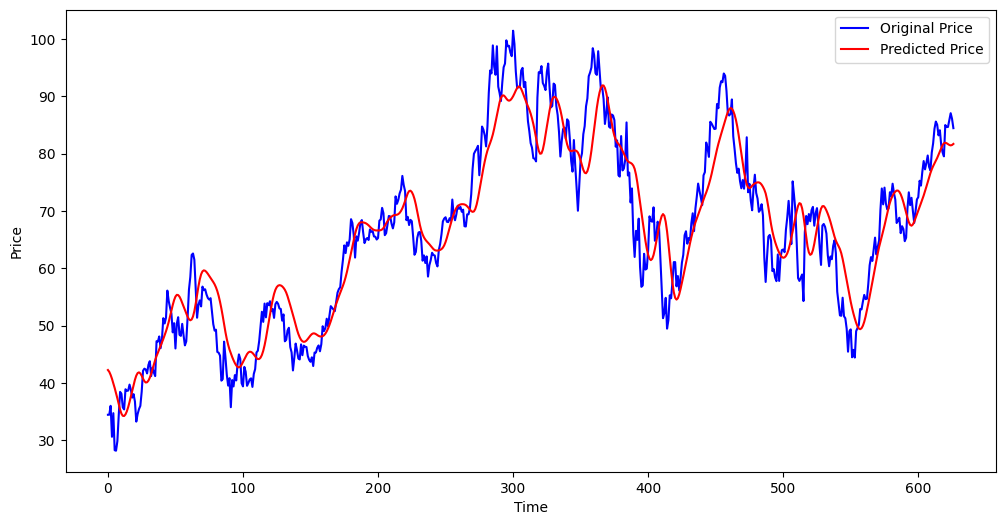

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4.542532119013522
